In [171]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
from dhlab.module_update import update, css, code_toggle

In [169]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Egennavn \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += ', '.join(Grouping[cat]) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [2]:
update('collocations')

Updated file `D:\Documents\notebøker\collocations.py`

In [3]:
from collocations import make_collocations, collocation, colls2df, urn_coll

In [4]:
import pandas as pd

In [14]:
import ast

In [11]:
colls_before = pd.read_json('demokrati_before.json')

In [6]:
colls_after = pd.read_json('demokrati_after.json')

In [19]:
colls_before.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_before.columns))

In [44]:
colls_after.columns = list(map(lambda x: ast.literal_eval(x)[0], colls_after.columns))

In [56]:
i = 8
colls_before.sort_values(by = colls_before.columns[i], ascending=False).head(20).fillna(-20).style.background_gradient(axis=1)

,1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1995
sant,-20,-20,-20,-10.5,-8.5,-7.0068,-3.26923,-2.13497,-1.81784,-2.34882,-2.06235,-2.69572,-2.812,-2.18238,-2.06268,-2.27615,-3.36079,-4.08485
Kristent,-20,-20,-20,-20,-20,-20,-20,-1.86364,-1.86364,-3.375,-10.5,-10.5,-7.33333,-20,-20,-10.5,-20,-8
sanne,-20,-20,-20,-10.5,-4.61111,-2.14286,-6.12222,-3.65002,-2.05107,-3.31095,-2.85583,-3.31378,-3.2097,-3.69881,-5.2284,-5.72833,-4.29006,-4.51035
amerikansk,-20,-20,-20,-5.75,-20,-20,-5.75,-6.83333,-2.12778,-8.66447,-5.96635,-6.63504,-4.33342,-4.37557,-8.03286,-9.24,-8.83484,-7.08974
lovpriste,-20,-20,-4.16667,-5.75,-8.38889,-10.5,-20,-2.77273,-2.22308,-2.46296,-2.13158,-2.30729,-1.70261,-3.16296,-2.61667,-4.40625,-3.08248,-2.34375
ekte,-20,-20,-20,-10.5,-4.66667,-8.63992,-3.5,-4.74107,-2.22609,-3.52242,-4.01815,-3.15134,-2.87206,-3.39698,-2.81532,-2.98792,-2.23119,-2.50287
levedyktig,-20,-20,-20,-20,-20,-20,-10.5,-3.375,-2.35185,-1.56038,-1.62533,-2.10686,-1.94187,-1.65489,-1.72655,-1.78125,-1.47955,-2.51
falske,-20,-20,-20,-20,-5.75,-3.43333,-4.16667,-4.26531,-2.36238,-9.1,-6.23333,-9.81429,-8.97222,-7.21875,-7.40833,-6.375,-6.7,-9.09184
liberalistiske,-20,-20,-20,-20,-20,-20,-7,-10.5,-2.43403,-6,-10.5,-10.5,-10.5,-10.5,-20,-20,-10.5,-20
misforstått,-20,-20,-20,-20,-20,-3.8,-5.60417,-4.125,-2.5125,-5.10417,-4.3125,-4.52778,-4.92188,-3.5625,-2.94609,-3.10185,-5.92088,-6.05556


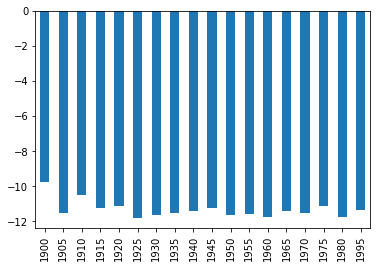

In [42]:
colls_before.loc['.'].plot(kind='bar')

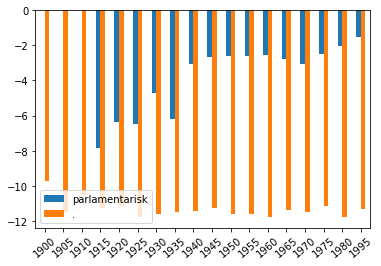

In [64]:
colls_before.loc[['parlamentarisk','.']].transpose().plot(kind='bar', rot=40)

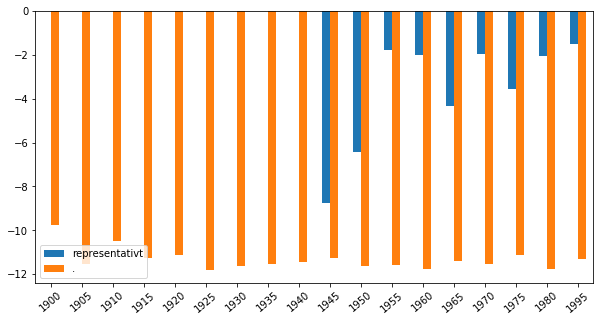

In [69]:
colls_before.loc[['representativt','.']].transpose().plot(kind='bar', rot=40, figsize=(10,5))

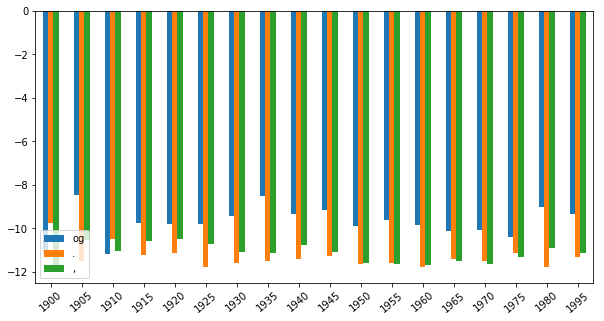

In [68]:
colls_before.loc[['og','.', ',']].transpose().plot(kind='bar', rot=40, figsize=(10,5))

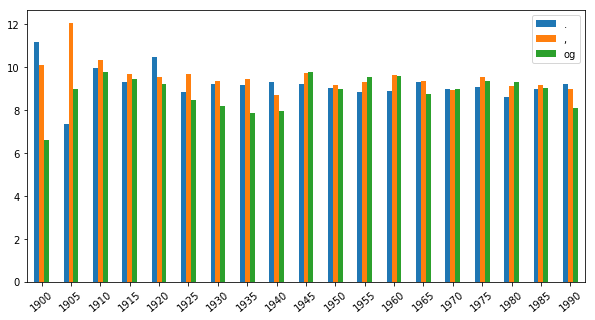

In [71]:
colls_after.loc[['.',',','og']].transpose().plot(kind='bar', rot=40, figsize=(10,5))

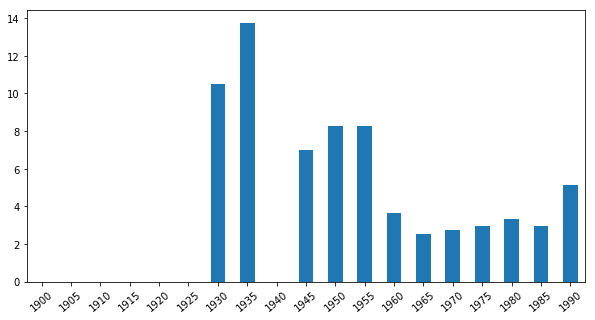

In [73]:
colls_after.loc['arbeidsplassen'].plot(kind='bar', rot=40, figsize=(10,5))

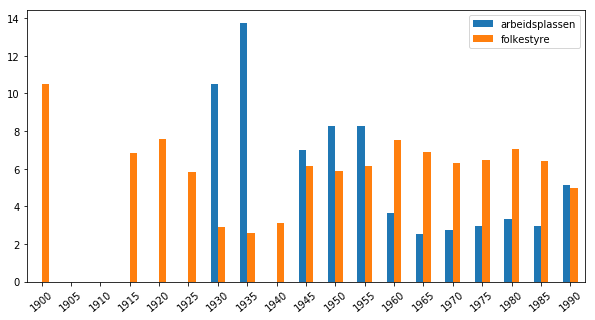

In [75]:
colls_after.loc[['arbeidsplassen', 'folkestyre']].transpose().plot(kind='bar', rot=40, figsize=(10,5))

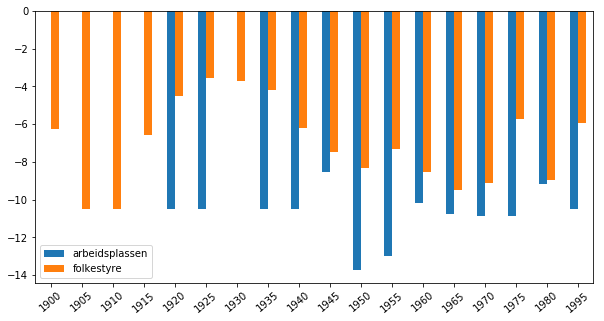

In [76]:
colls_before.loc[['arbeidsplassen', 'folkestyre']].transpose().plot(kind='bar', rot=40, figsize=(10,5))

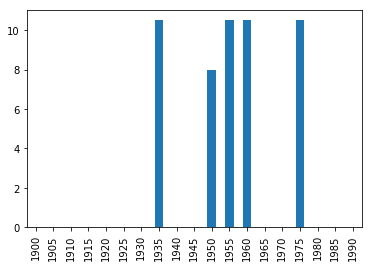

In [57]:
colls_after.loc['sannere'].plot(kind='bar')

In [77]:
freq_before = pd.read_json('demokrati_freq_before.json')

In [78]:
freq_after = pd.read_json('demokrati_freq_after.json')

In [96]:
show = lambda res, col, axis=1: res.sort_values(by=col, ascending=False).head(20).fillna(0).style.background_gradient(axis=axis)

In [98]:
show(freq_before, 1980, 0)

,1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1995
.,52,111,422,1732,1090,1185,1151,3521,2853,8843,9304,9432,17088,14841,13445,12202,9861,17586
",",71,118,401,1643,871,1016,938,2603,1969,6041,6652,6239,11603,8921,8196,7986,6537,11038
i,18,36,155,702,448,526,531,1576,1289,4459,5413,5934,10357,8715,8423,7903,6216,10975
og,25,50,171,801,501,609,724,2459,1886,5528,5686,5445,10330,8052,7401,7516,6027,10214
er,16,21,141,547,279,432,479,1365,978,3643,3919,4250,6513,5334,5542,5759,4754,8034
det,37,49,208,1057,598,805,777,2265,1781,4740,5190,5526,8450,6619,6585,6114,4342,6052
for,24,28,107,502,297,324,381,1312,1081,3279,3814,3627,6515,5629,5284,5150,4184,6889
et,12,24,74,387,174,261,269,826,871,2677,3296,3802,5823,4667,4361,4671,3685,6246
som,11,25,120,460,250,375,422,1253,921,2999,3548,3584,5941,4922,4965,4630,3480,6060
til,18,32,92,375,232,275,287,895,705,2559,2720,2677,4738,3975,3943,3696,3070,5381


In [101]:
show(freq_after, 1990, axis=1)

,1900,1905,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990
.,57,112,508,2175,1308,1530,1525,4805,3559,11814,11992,12135,21606,18031,16331,15446,12684,17825,26235
",",72,140,424,1843,1032,1172,1120,2943,2348,7326,7877,8095,14349,11386,10387,9916,8037,11383,16550
i,30,50,203,841,560,653,581,1797,1466,4931,5860,5998,11592,10422,10451,8418,6633,9137,13702
og,23,63,203,863,575,751,793,2550,1868,5680,5961,5575,10839,8723,8264,8245,6637,8618,12790
er,18,26,153,554,323,437,489,1518,1096,3856,4244,4438,7289,5970,5938,5918,4723,6152,9184
det,20,30,123,587,328,462,505,1582,1237,3670,4054,4380,6826,5483,5341,5159,4002,4821,6681
som,11,25,104,513,274,373,437,1418,1155,3081,3480,3606,6283,4884,5071,4831,3546,4719,6529
til,9,22,89,423,212,273,271,822,671,2119,2471,2503,4284,3615,3557,3555,2586,3699,5432
for,20,35,75,334,220,275,270,909,767,2163,2529,2544,4450,3583,3626,3646,2896,3467,5341
å,0,0,0,5,32,180,249,690,621,1896,2326,2239,3952,3417,3369,3366,2730,3407,5016


In [104]:
coll = dict()
step = 3
for i in range(1920, 2000, step):
    print(i)
    try:
        coll[i] = nb.collocation('demokrati', yearfrom=i, yearto=i+step, before=10, after=10, corpus='avis')
    except:
        try:
            coll[i] = nb.collocation('demokrati', yearfrom=i, yearto=i+step, before=10, after=10, corpus='avis')
        except:
            try:
                coll[i] = nb.collocation('demokrati', yearfrom=i, yearto=i+step, before=10, after=10, corpus='avis')
            except:
                print('gir opp', i)


1920
1923
1926
1929
1932
1935
1938
1941
1944
1947
1950
1953
1956
1959
1962
1965
1968
1971
1974
1977
1980
1983
1986
1989
1992
1995
1998


In [106]:
tot = nb.frame(nb.totals(50000), 'tot')

In [123]:
colls = pd.concat([nb.frame(coll[d], d) for d in coll], axis=1, sort=False).fillna(0)

In [131]:
agg = pd.DataFrame()
step = 5
for i in range(0, len(colls.columns), step):
    agg[colls.columns[i]] = colls[colls.columns[i:i+step]].sum(axis=1)

In [133]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]/tot.tot

In [156]:
nb.normalize_corpus_dataframe(pmi)

True

In [158]:
pmi.sort_values(by=1995, ascending=False).head(20).fillna(0).style.background_gradient(axis=1)

,1920,1935,1950,1965,1980,1995
menneskerettigheter,0.00020651,0.00128251,0.00104419,0.0012475,0.00800673,0.0195697
ytringsfrihet,0.00102471,0.00148489,0.00087177,0.00275425,0.00709826,0.0110127
19.00,0,0.000168404,0.00269868,0.00117794,0.00183966,0.00928756
Akademiet,0,4.78231e-05,0,0,0,0.00651446
diktatur,0.0275252,0.0201816,0.0104121,0.0107258,0.00974349,0.00613167
Demokrati,0.00185841,0.00360669,0.00233054,0.00457253,0.00378791,0.00469513
parlamentarisk,0.00461876,0.00139324,0.00321979,0.00589375,0.00448428,0.00388101
Burma,0,3.02725e-05,4.6947e-05,9.92568e-06,0.000896371,0.00346888
liberalt,0.000798615,0.00104705,0.00108964,0.00177072,0.00140995,0.00325401
demokrati,0.00553765,0.00652724,0.00494788,0.00512981,0.00349728,0.00323475


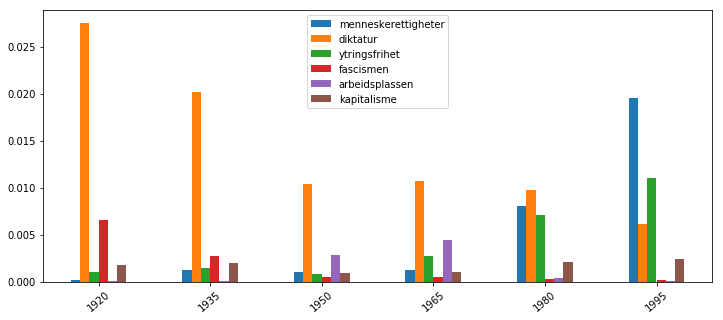

In [178]:
pmi.loc[['menneskerettigheter','diktatur',"ytringsfrihet", 'fascismen','arbeidsplassen', 'kapitalisme']].transpose().plot(kind='bar', rot=40, figsize=(12,5)) 

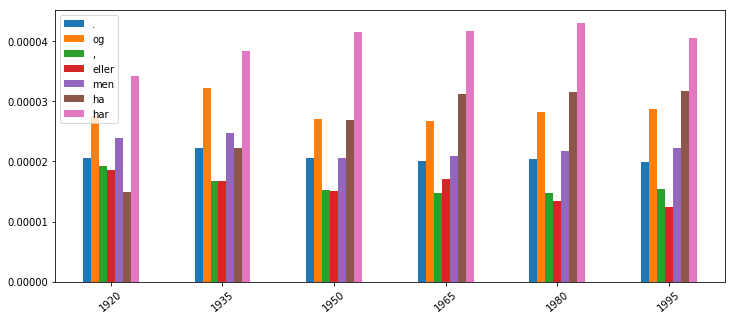

In [179]:
pmi.loc[['.','og', ',','eller', 'men', 'ha','har']].transpose().plot(kind='bar', rot=40, figsize=(12,5)) 

In [172]:
mdprint(pmi.loc[['menneskerettigheter','diktatur',"ytringsfrihet", 'fascismen','arbeidsplassen', 'kapitalisme']],0)

## Egennavn 


## subst
menneskerettigheter, diktatur, ytringsfrihet, fascismen, kapitalisme
## unknown
arbeidsplassen
